#CHALLENGE 3: Clasificación con SVM

**Estudiante: Daniel Ivan Zavaleta Guzmán**

##Introducción

- Problemática

La resistencia a los antimicrobianos es una preocupación de salud pública, con el potencial de causar graves consecuencias en el tratamiento de infecciones bacterianas. Uno de los enfoques para abordar este problema es el desarrollo de nuevos agentes antimicrobianos con mecanismos de acción que puedan superar los mecanismos de resistencia bacteriana existentes.

Los sideróforos, compuestos orgánicos producidos por microorganismos, han demostrado tener propiedades antimicrobianas en estudios preclínicos. Sin embargo, su eficacia clínica como agentes terapéuticos aún no ha sido completamente explorada. Una de las principales limitaciones para su aplicación clínica es la falta de comprensión sobre las características estructurales que contribuyen a su actividad antimicrobiana.

Por lo tanto, sería útil identificar las características estructurales de los sideróforos, como la presencia de grupos funcionales específicos, geometría molecular, entre otros descriptores químicos. Esto podría proporcionar información valiosa para el diseño y desarrollo de nuevos agentes antimicrobianos basados en sideróforos con mayor eficacia clínica.

Referencia:

Saha, M., Sarkar, S., Sarkar, B. et al. Microbial siderophores and their potential applications: a review. Environ Sci Pollut Res 23, 3984–3999 (2016). https://doi.org/10.1007/s11356-015-4294-0


##Metodología

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

###Obtención de base de datos

**BBDD inicial de sideroforos**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB.csv", index_col="ID")
df

,Compounds,Microorganism,hydroxamate,catecholate,a-hydroxycarboxylate,carboxylate,phenolate,citrate,other,SMILES,validate smiles,SMARTS,SELFIES
ID,,,,,,,,,,,,,
1,"2,3-dihydroxybenzoic acid","Azobacter vinelandii, Azospirillum lipoferum, ...",0,1,0,1,0,0,0,OC(=O)c1c(O)c(O)ccc1,True,[#8]-[#6](=[#8])-[#6]1:[#6](-[#8]):[#6](-[#8])...,[O][C][=Branch1][C][=O][C][=C][Branch1][C][O][...
2,"2,3-dihydroxybenzoylglycine",Bacillus subtilis,0,1,0,1,0,0,0,c1ccc(O)c(O)c1C(=O)NCC(O)=O,True,[#6]1:[#6]:[#6]:[#6](-[#8]):[#6](-[#8]):[#6]:1...,[C][=C][C][=C][Branch1][C][O][C][Branch1][C][O...
3,"2,3-dihydroxybenzoylserine","Aerobacter aerogenes, Escherichia ST2, Escheri...",0,1,0,1,0,0,0,OC[C@@H](C(O)=O)NC(=O)c1c(O)c(O)ccc1,True,[#8]-[#6]-[#6@@H](-[#6](-[#8])=[#8])-[#7]-[#6]...,[O][C][C@@H1][Branch1][=Branch1][C][Branch1][C...
4,"2,3-dihydroxybenzoylthreonine",Klebsiella oxytoca,0,1,0,1,0,0,0,O[C@H](C)[C@@H](C(O)=O)NC(=O)c1cccc(O)c1O,True,[#8]-[#6@H](-[#6])-[#6@@H](-[#6](-[#8])=[#8])-...,[O][C@H1][Branch1][C][C][C@@H1][Branch1][=Bran...
5,2-hydroxybenzoic acid,"Azospirillum lipoferum, Burkholderia cepacia",0,0,0,1,1,0,0,OC(=O)c1c(O)cccc1,True,[#8]-[#6](=[#8])-[#6]1:[#6](-[#8]):[#6]:[#6]:[...,[O][C][=Branch1][C][=O][C][=C][Branch1][C][O][...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,Desferriastechrome,NaN,2,0,0,0,0,0,0,O=c1c(C)nc(OC)c(n1O)Cc2c[nH]c(c23)c(ccc3)CC=C(C)C,True,[#8]=[#6]1:[#6](-[#6]):[#7]:[#6](-[#8]-[#6]):[...,[O][=C][C][Branch1][C][C][=N][C][Branch1][Ring...
278,Fetroja,NaN,0,1,0,2,0,0,1,c1cc(O)c(O)c(Cl)c1C(=O)NCC[N+]2(CCCC2)CC(=C3C(...,True,[#6]1:[#6]:[#6](-[#8]):[#6](-[#8]):[#6](-[#17]...,[C][=C][C][Branch1][C][O][=C][Branch1][C][O][C...
279,Cefiderocol,NaN,0,1,0,2,0,0,1,c1cc(O)c(O)c(Cl)c1C(=O)NCC[N+]2(CCCC2)CC(=C3C(...,True,[#6]1:[#6]:[#6](-[#8]):[#6](-[#8]):[#6](-[#17]...,[C][=C][C][Branch1][C][O][=C][Branch1][C][O][C...


La cantidad de los grupos funcionales **hydroxamate	catecholate	a-hydroxycarboxylate	carboxylate	phenolate	citrate	other** son los targets en esta base de datos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 1 to 281
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Compounds             221 non-null    object
 1   Microorganism         149 non-null    object
 2   hydroxamate           221 non-null    int64 
 3   catecholate           221 non-null    int64 
 4   a-hydroxycarboxylate  221 non-null    int64 
 5   carboxylate           221 non-null    int64 
 6   phenolate             221 non-null    int64 
 7   citrate               221 non-null    int64 
 8   other                 221 non-null    int64 
 9   SMILES                221 non-null    object
 10  validate smiles       221 non-null    bool  
 11  SMARTS                221 non-null    object
 12  SELFIES               221 non-null    object
dtypes: bool(1), int64(7), object(5)
memory usage: 22.7+ KB


Como solo se necesitan la cantidad de los grupos funcionales mencionados, hay que extraerlos.

In [4]:
cols_grupos_f = ["hydroxamate","catecholate","a-hydroxycarboxylate","carboxylate","phenolate","citrate","other"]
df = df[cols_grupos_f]
df.shape

(221, 7)

Se verifica si hay columnas con valores nulos.

In [5]:
df.isnull().sum()

hydroxamate             0
catecholate             0
a-hydroxycarboxylate    0
carboxylate             0
phenolate               0
citrate                 0
other                   0
dtype: int64

Se verifica los valores que existen en cada columna.

In [6]:
for col in df.columns:
    print(f"{col} : {df[col].unique()}")

hydroxamate : [0 3 2 1 4]
catecholate : [1 0 3 2]
a-hydroxycarboxylate : [0 2 1]
carboxylate : [1 0 2 4 3]
phenolate : [0 1 2]
citrate : [0 1 2]
other : [0 1]


Con esto ya se sabe el rango de valores que puede tomar cada columna y que no hay valores nulos.

**Base de datos 1 con los features de los sideroforos**

In [7]:
df1 = pd.read_csv("https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB1.csv", index_col="ID")
df1

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,...,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_amide,fr_benzene,fr_ester,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond
ID,,,,,,,,,,,,,,,,,,,,,
1,11.191262,-1.343472,11.191262,0.665370,0.522491,154.121,148.073,154.026609,58,0.339119,...,0,0,0,0,0,1,0,1,2,1
2,12.228676,-3.436129,12.228676,0.586755,0.522624,211.173,202.101,211.048072,80,0.322481,...,0,1,0,0,1,1,0,1,2,2
3,12.627825,-3.816337,12.627825,0.758838,0.442264,241.199,230.111,241.058637,92,0.328131,...,0,1,0,0,1,1,0,1,2,2
4,12.854441,-4.102795,12.854441,0.884463,0.468346,255.226,242.122,255.074287,98,0.328426,...,0,1,0,0,1,1,0,1,2,2
5,11.108779,-1.310880,11.108779,0.630759,0.610259,138.122,132.074,138.031694,52,0.338969,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,13.053345,-3.721588,13.053345,0.123679,0.544261,353.422,330.238,353.173942,136,0.327527,...,2,1,0,0,0,1,0,1,0,0
278,14.672799,-5.563063,14.672799,0.044514,0.049920,753.236,717.956,752.156986,268,0.352359,...,4,2,1,0,3,1,0,0,2,2
279,14.672799,-5.563063,14.672799,0.044514,0.049920,753.236,717.956,752.156986,268,0.352359,...,4,2,1,0,3,1,0,0,2,2


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 1 to 281
Columns: 118 entries, MaxEStateIndex to fr_phenol_noOrthoHbond
dtypes: float64(86), int64(32)
memory usage: 205.5+ KB


Se corrobora que no se tiene valores nulos, para no eliminar ninguna columna de los features de este dataset.

In [9]:
sum(df1.isna().any() )

0

Además, para este caso, no es necesario verificar los valores únicos en los features.

**Base de datos 2 con los features de los sideroforos**

In [10]:
df2 = pd.read_csv("https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB2.csv", index_col=0)
df2

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
218,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
219,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 0 to 220
Columns: 2048 entries, Col_0 to Col_2047
dtypes: int64(2048)
memory usage: 3.5 MB


Se corrobora que no se tiene valores nulos, para no eliminar ninguna columna de los features de este dataset.

In [12]:
sum(df2.isna().any() )

0

No es necesario verificar los valores únicos en los features de este dataset.

**Base de datos 3 con los features de los sideroforos**

In [13]:
df3 = pd.read_csv("https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB3.csv", index_col=0)
df3

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,8.094413,7.861189,1,0,13.168697,2.318335,4.636669,13.168697,1.197154,3.295042,...,9.148784,41.129752,154.026609,9.060389,146,15,52.0,59.0,5.194444,2.500000
1,11.032230,10.263086,1,0,18.097095,2.335155,4.670310,18.097095,1.206473,3.592093,...,9.344959,46.399340,211.048072,8.793670,386,20,70.0,78.0,6.805556,3.416667
2,12.406004,11.779674,1,0,20.564183,2.348305,4.696611,20.564183,1.209658,3.716060,...,9.531336,49.175108,241.058637,8.609237,530,25,80.0,91.0,7.916667,3.944444
3,13.291450,12.587729,1,0,21.314984,2.355933,4.711866,21.314984,1.184166,3.774948,...,9.632138,50.585433,255.074287,8.228203,612,27,86.0,98.0,8.777778,4.055556
4,7.318357,7.069195,1,0,11.945822,2.267184,4.534368,11.945822,1.194582,3.197666,...,8.912069,39.310842,138.031694,8.626981,114,12,46.0,51.0,4.333333,2.305556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,20.062858,16.684620,0,0,33.174343,2.476201,4.895261,33.174343,1.275936,4.184153,...,10.226549,75.072873,353.173942,7.207631,1698,43,136.0,162.0,9.611111,5.777778
217,39.117560,30.767928,2,1,62.073162,2.582734,5.162234,62.073162,1.241463,4.842835,...,11.066154,104.451812,752.156986,8.848906,10975,84,270.0,324.0,19.513889,10.736111
218,39.117560,30.767928,2,1,62.073162,2.582734,5.162234,62.073162,1.241463,4.842835,...,11.066154,104.451812,752.156986,8.848906,10975,84,270.0,324.0,19.513889,10.736111
219,39.715277,31.264081,2,1,63.163613,2.582735,5.162236,63.163613,1.238502,4.860728,...,11.079385,105.521109,766.172636,8.706507,11622,86,274.0,329.0,19.763889,11.069444


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 0 to 220
Columns: 1826 entries, ABC to mZagreb2
dtypes: bool(2), float64(1002), int64(325), object(497)
memory usage: 3.1+ MB


Se observa que hay columnas con valores tipo object y tipo boolean en este dataset.

Se corrobora que no se tiene valores nulos, para no eliminar ninguna columna de los features de este dataset.

In [15]:
sum(df3.isnull().sum())

0

Se verifica si entre los valores únicos de este dataset, de las columnas con valores tipo object, existe algún valor que es númerico. En caso de que existan valores numéricos en strings, se convierten en tipo numerico.

In [16]:
df3_datatype_object = df3.select_dtypes("object")
for col in df3_datatype_object.columns:
    print("Columna",col, ":",df3_datatype_object[col].unique())

Se han truncado las últimas 5000 líneas del flujo de salida.
 '0.20326875185124002' '0.19458265943994502' '0.19854331920481424'
 '0.565670850273997' '-0.11769049761991955' '-0.041944944198331884'
 '-0.062105880585687674' '-0.1000633334786191' '-0.1008658311045622'
 '-0.10542489798203886' '-0.0842335597297114' '-0.10794510586751405'
 '0.09646485035742096' '-0.26428436259343774' '0.040232766965459424'
 '0.007534774682847236' '0.0992949064092531' '0.07092904400254606'
 '0.08624783844547165' '0.1238772726191408' '-0.1732555172145971'
 '0.013160954051338963' '0.004561920649574311' '-0.007417965347949487'
 '-0.01615443206922595' '0.1739723302777809' '0.18050052428314073'
 '0.21154295395644562' '0.21299710822280024' '0.18162619994127216'
 '0.2254616614835065' '0.21850993806877972' '0.21946147630667728'
 '0.07546396006092977' '0.1514797723782744' '-0.03226633472935795'
 '0.02212757839604672' '-0.04406645619890904' '0.17283847457932666'
 '0.142449540716307' '-0.15132988752299784' '0.15984439258

In [17]:
#al usar coerce, los valores que no se pueden convertir en numericos se convierten en tipo NaN
df3 = df3.apply(pd.to_numeric, errors="coerce")

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 0 to 220
Columns: 1826 entries, ABC to mZagreb2
dtypes: bool(2), float64(1499), int64(325)
memory usage: 3.1 MB


También las columnas con valores booleanos se pasan a tipo entero.

In [19]:
boolean_columns = df3.select_dtypes(include=bool).columns
df3[boolean_columns] = df3[boolean_columns].astype(int)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 0 to 220
Columns: 1826 entries, ABC to mZagreb2
dtypes: float64(1499), int64(327)
memory usage: 3.1 MB


Ahora, como se pasaron los valores tipo object a tipo numerico, se han generado algunos valores tipo NaN, y esas columnas se eliminan.

In [20]:
df3 = df3.dropna(axis=1)

In [21]:
sum(df3.isnull().sum())

0

###Pre procesamiento de datos

Se verifica con datos estadisticos la distribucion de la data en cada dataset, y se reduce la dimensionalidad.

**Base de datos 1 con los features de los sideroforos**

In [22]:
df1.describe().T #medidas estadisticas de la data

,count,mean,std,min,25%,50%,75%,max
MaxEStateIndex,221.0,14.361458,1.306650,9.667832,13.693037,14.222851,15.424962,16.647474
MinEStateIndex,221.0,-5.557024,1.186967,-7.433673,-6.290073,-5.571034,-5.211695,-0.881916
MaxAbsEStateIndex,221.0,14.361458,1.306650,9.667832,13.693037,14.222851,15.424962,16.647474
MinAbsEStateIndex,221.0,1.244646,0.508051,0.011382,1.036932,1.280840,1.618549,2.220550
qed,221.0,0.151045,0.203659,0.007004,0.030619,0.058700,0.158075,0.881757
...,...,...,...,...,...,...,...,...
fr_benzene,221.0,0.782805,1.090402,0.000000,0.000000,0.000000,1.000000,4.000000
fr_ester,221.0,0.325792,0.727833,0.000000,0.000000,0.000000,0.000000,3.000000
fr_para_hydroxylation,221.0,0.588235,0.985184,0.000000,0.000000,0.000000,1.000000,3.000000
fr_phenol,221.0,1.312217,2.010718,0.000000,0.000000,0.000000,2.000000,6.000000


Para detectar redundancia entre features, y también reducir dimensionalidad, se usa una matriz de correlación.

<Axes: >

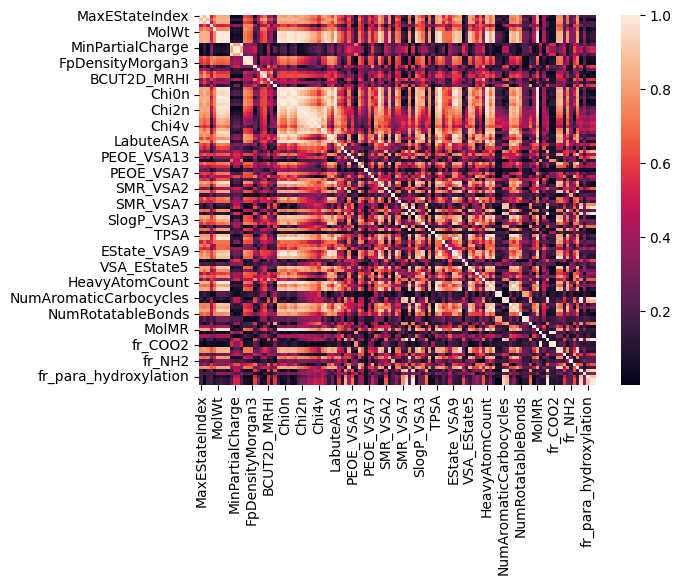

In [23]:
plt.figure()
sns.heatmap(df1.corr().abs())

Se extraen los features con correlacion mayor a 0.9 para no tener redundancia.

In [24]:
corr_mat = df1.corr()
columns = np.full((corr_mat.shape[0], ), True, dtype=bool)
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df1.columns[columns]
df1_filtered = df1[selected_columns]
df1_filtered

,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,NumSaturatedHeterocycles,RingCount,MolLogP,fr_Al_COO,fr_Al_OH,fr_NH0,fr_NH2,fr_N_O,fr_ester,fr_para_hydroxylation
ID,,,,,,,,,,,,,,,,,,,,,
1,11.191262,-1.343472,0.665370,0.522491,154.121,0.339119,-0.504241,0.504241,1.272727,12.704327,...,0,1,0.79600,0,0,0,0,0,0,1
2,12.228676,-3.436129,0.586755,0.522624,211.173,0.322481,-0.504242,0.504242,1.400000,12.609118,...,0,1,-0.08780,1,0,0,0,0,0,1
3,12.627825,-3.816337,0.758838,0.442264,241.199,0.328131,-0.504242,0.504242,1.352941,11.812415,...,0,1,-0.72690,1,1,0,0,0,0,1
4,12.854441,-4.102795,0.884463,0.468346,255.226,0.328426,-0.504242,0.504242,1.333333,11.309400,...,0,1,-0.33840,1,1,0,0,0,0,1
5,11.108779,-1.310880,0.630759,0.610259,138.122,0.338969,-0.507053,0.507053,1.400000,11.839697,...,0,1,1.09040,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,13.053345,-3.721588,0.123679,0.544261,353.422,0.327527,-0.479640,0.479640,1.346154,10.480402,...,0,3,3.37842,0,0,2,0,0,0,1
278,14.672799,-5.563063,0.044514,0.049920,753.236,0.352359,-0.504221,0.504221,1.180000,11.853578,...,2,5,1.15300,2,0,4,1,0,0,0
279,14.672799,-5.563063,0.044514,0.049920,753.236,0.352359,-0.504221,0.504221,1.180000,11.853578,...,2,5,1.15300,2,0,4,1,0,0,0


Se redujo la cantidad de features en el dataset 1 de 118 a 62.

<Axes: >

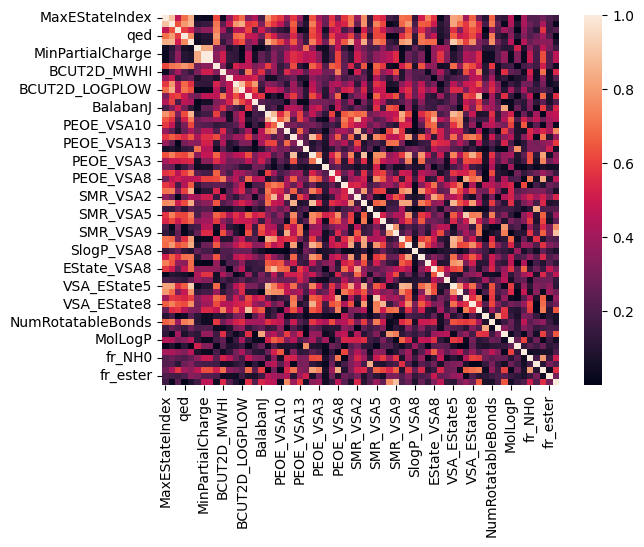

In [25]:
sns.heatmap(df1_filtered.corr().abs(), annot=False)

In [26]:
df1_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 1 to 281
Data columns (total 62 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MaxEStateIndex            221 non-null    float64
 1   MinEStateIndex            221 non-null    float64
 2   MinAbsEStateIndex         221 non-null    float64
 3   qed                       221 non-null    float64
 4   MolWt                     221 non-null    float64
 5   MaxPartialCharge          221 non-null    float64
 6   MinPartialCharge          221 non-null    float64
 7   MaxAbsPartialCharge       221 non-null    float64
 8   FpDensityMorgan1          221 non-null    float64
 9   BCUT2D_MWHI               221 non-null    float64
 10  BCUT2D_MWLOW              221 non-null    float64
 11  BCUT2D_CHGLO              221 non-null    float64
 12  BCUT2D_LOGPLOW            221 non-null    float64
 13  BCUT2D_MRHI               221 non-null    float64
 14  BCUT2D_MRLOW   

**Base de datos 2 con los features de los sideroforos**

In [27]:
df2.describe().T #medidas estadisticas de la data

,count,mean,std,min,25%,50%,75%,max
Col_0,221.0,0.004525,0.067267,0.0,0.0,0.0,0.0,1.0
Col_1,221.0,0.511312,0.501007,0.0,0.0,1.0,1.0,1.0
Col_2,221.0,0.054299,0.227120,0.0,0.0,0.0,0.0,1.0
Col_3,221.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Col_4,221.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
Col_2043,221.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Col_2044,221.0,0.013575,0.115980,0.0,0.0,0.0,0.0,1.0
Col_2045,221.0,0.004525,0.067267,0.0,0.0,0.0,0.0,1.0
Col_2046,221.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


Se extraen los features con correlacion mayor a 0.9 para no tener redundancia.

In [28]:
corr_mat = df2.corr()
columns = np.full((corr_mat.shape[0], ), True, dtype=bool)
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df2.columns[columns]
df2_filtered = df2[selected_columns]
df2_filtered

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2035,Col_2036,Col_2037,Col_2038,Col_2040,Col_2041,Col_2043,Col_2044,Col_2046,Col_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
218,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
219,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Se reduce la cantidad de features en el dataset 2 de 2048 a 1636.

In [29]:
df2_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 0 to 220
Columns: 1636 entries, Col_0 to Col_2047
dtypes: int64(1636)
memory usage: 2.8 MB


**Base de datos 3 con los features de los sideroforos**

In [30]:
df3.describe().T #medidas estadisticas de la data

,count,mean,std,min,25%,50%,75%,max
ABC,221.0,33.769908,12.809739,7.318357,23.995511,35.256849,41.510031,63.634503
ABCGG,221.0,25.995632,9.255202,7.069195,19.190794,26.565556,32.126831,50.441623
nAcid,221.0,0.687783,1.025708,0.000000,0.000000,0.000000,1.000000,5.000000
nBase,221.0,0.814480,1.597432,0.000000,0.000000,0.000000,1.000000,9.000000
SpAbs_A,221.0,55.519106,21.113485,11.945822,38.676243,58.608500,68.335016,103.168434
...,...,...,...,...,...,...,...,...
WPol,221.0,66.719457,27.873465,12.000000,46.000000,70.000000,84.000000,138.000000
Zagreb1,221.0,215.085973,82.399784,46.000000,154.000000,226.000000,270.000000,414.000000
Zagreb2,221.0,240.067873,93.677105,51.000000,170.000000,252.000000,295.000000,474.000000
mZagreb1,221.0,19.210847,7.457016,4.333333,14.805556,19.138889,24.500000,36.583333


Se extraen los features con correlacion mayor a 0.9 para no tener redundancia.

In [31]:
corr_mat = df3.corr()
columns = np.full((corr_mat.shape[0], ), True, dtype=bool)
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df3.columns[columns]
df3_filtered = df3[selected_columns]
df3_filtered

,ABC,nAcid,nBase,SpMax_A,SpMAD_A,VE1_A,VE2_A,VR1_A,VR3_A,nAromAtom,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex
0,8.094413,1,0,2.318335,1.197154,3.080399,0.280036,37.279058,3.713742,6,...,0.118519,0.070833,0.057333,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667
1,11.032230,1,0,2.335155,1.206473,3.345805,0.223054,91.175359,4.918250,6,...,0.111111,0.059375,0.050833,0.024573,0.024853,0.016059,0.010204,0.000000,0.000000,1.000000
2,12.406004,1,0,2.348305,1.209658,3.605699,0.212100,91.945243,5.051821,6,...,0.115942,0.062500,0.046349,0.025327,0.023382,0.015625,0.010204,0.000000,0.000000,1.000000
3,13.291450,1,0,2.355933,1.184166,3.763469,0.209082,90.572366,5.093936,6,...,0.115556,0.067130,0.043889,0.025585,0.025561,0.016059,0.010204,0.000000,0.000000,1.000000
4,7.318357,1,0,2.267184,1.194582,2.964744,0.296474,32.367050,3.477141,6,...,0.102564,0.072917,0.037778,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,20.062858,0,0,2.476201,1.275936,4.411843,0.169686,233.834914,6.410127,15,...,0.094444,0.048127,0.045356,0.026142,0.018802,0.018735,0.012426,0.010430,0.011435,0.857143
217,39.117560,2,1,2.582734,1.241463,4.366369,0.087327,3989.556853,9.900873,11,...,0.101266,0.064484,0.040657,0.034311,0.019850,0.016982,0.012424,0.010942,0.007875,0.916667
218,39.117560,2,1,2.582734,1.241463,4.366369,0.087327,3989.556853,9.900873,11,...,0.101266,0.064484,0.040657,0.034311,0.019850,0.016982,0.012424,0.010942,0.007875,0.916667
219,39.715277,2,1,2.582735,1.238502,4.369211,0.085671,4612.480024,10.065761,11,...,0.100000,0.065891,0.039231,0.034892,0.019409,0.016789,0.012272,0.010800,0.007560,0.916667


Se reduce la cantidad de features en el dataset 3 de 1329 a 533.


In [32]:
df3_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 0 to 220
Columns: 533 entries, ABC to TopoShapeIndex
dtypes: float64(288), int64(245)
memory usage: 922.0 KB


**Base de datos de features en conjunto**

Ahora, se juntan los features obtenidos de base de datos 1, base de datos 2, y base de datos 3, para realizar la posterior clasificación.

In [33]:
#Combinar los DataFrames a lo largo de las columnas
df1_filtered = df1_filtered.reset_index(drop=True)
df_junto = pd.concat([df1_filtered, df2_filtered, df3_filtered], axis=1, ignore_index=True)

In [34]:
df_junto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Columns: 2231 entries, 0 to 2230
dtypes: float64(339), int64(1892)
memory usage: 3.8 MB


Para realizar la clasificación en base a targets, se siguen dos métodos:


*  Método 1: Utilizando todas la columnas de los targets, pero solo la ausencia o presencia de estos grupos funcionales
*  Método 2: Utilizando todas las columnas de los targets, y teniendo en cuenta la cantidad de grupos funcionales

En ambos métodos, se emplean la base de datos de los features en conjunto (df_junto), o si no solo la base de datos 1 (df1_filtered).



**Método 1**

Se convierten los valores de cantidad de grupos funcionales (targets) en 0s y 1s.

Cada dígito binario  se debe interpretar la presencia (1) o ausencia (0) de un target específico.

In [35]:
y0 = df.applymap(lambda x: 1 if x > 0 else x)
y0

,hydroxamate,catecholate,a-hydroxycarboxylate,carboxylate,phenolate,citrate,other
ID,,,,,,,
1,0,1,0,1,0,0,0
2,0,1,0,1,0,0,0
3,0,1,0,1,0,0,0
4,0,1,0,1,0,0,0
5,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...
277,1,0,0,0,0,0,0
278,0,1,0,1,0,0,1
279,0,1,0,1,0,0,1


Ahora, se combinan los nros binarios en un solo nro decimal, para representar la presencia o ausencia de los diferentes targets de manera conjunta en una sola columna.

Y esto sirve para reducir la dimensionalidad de los datos al combinar multiples variables (los targets) en una sola variable.


In [36]:
def convert_to_output(number_list):
    return int("".join(map(str, number_list)), 2)

decoded = y0.apply(convert_to_output, axis=1)
y0 = pd.DataFrame(decoded, columns=["decoded"])
y0 = y0.reset_index(drop=True)
y0

,decoded
0,40
1,40
2,40
3,40
4,12
...,...
216,64
217,41
218,41
219,9


Se visualiza la representación de los targets en conjunto con un gráfico de barras.

<Axes: xlabel='decoded'>

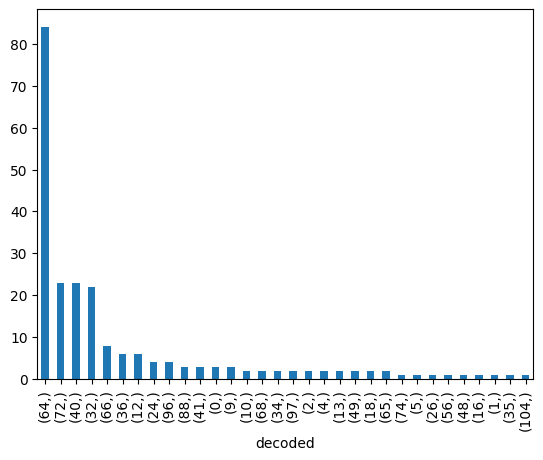

In [37]:
y0.value_counts().plot(kind="bar")

Se eliminan las muestras (filas) que pertenecen a clases que se repiten menos de 5 veces, ya que esto se considera como una fuente de error, y se visualiza el nuevo gráfico de barras.

<Axes: xlabel='decoded'>

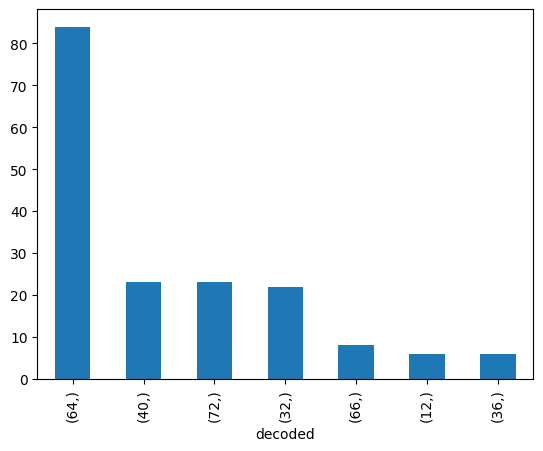

In [38]:
counts = y0["decoded"].value_counts()
new_values = counts[counts >= 5].index.to_list()
mask0 = y0["decoded"].isin(new_values)
y0 = y0[mask0]
y0.value_counts().plot(kind="bar") #grafico de barras

Se obtiene 7 clases específicas según la presencia o ausencia de los grupos funcionales.



**Método 2**

In [39]:
y1 = df
def convert_to_output(number_list):
    return int("".join(map(str, number_list)), 10)
decoded = y1.apply(convert_to_output, axis=1)
y1 = pd.DataFrame(decoded, columns=["decoded"])
y1 = y1.reset_index(drop=True)
y1

,decoded
0,101000
1,101000
2,101000
3,101000
4,1100
...,...
216,2000000
217,102001
218,102001
219,2001


<Axes: xlabel='decoded'>

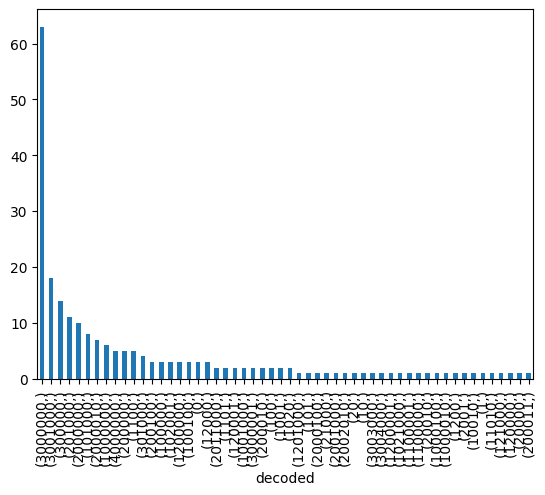

In [40]:
y1.value_counts().plot(kind="bar")

Se eliminan también las clases con menos de 5 repeticiones.

<Axes: xlabel='decoded'>

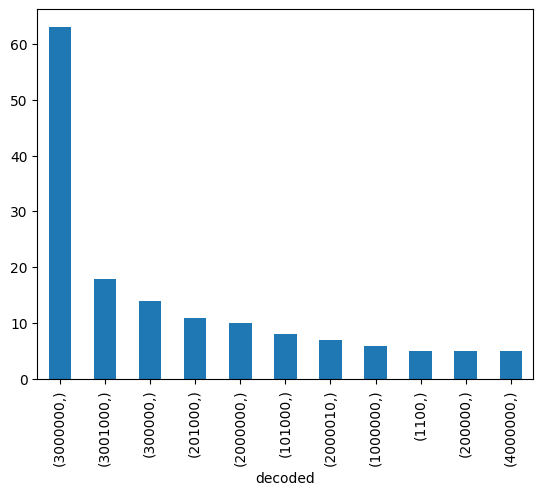

In [41]:
counts = y1["decoded"].value_counts()
new_values = counts[counts >= 5].index.to_list()
mask1 = y1["decoded"].isin(new_values)
y1 = y1[mask1]
y1.value_counts().plot(kind="bar")

Se obtienen 11 clases específicas según la cantidad de grupos funcionales.

###Entrenamiento de modelos de clasificación con ML

Los modelos de clasificación tratados en clase pasadas fueron K-Nearest Neighbors (KNN) y Naive Bayes, y se comparan con el último modelo de clasificación tratado en clase, que es SVM, por lo tanto, esos son los que se usan en este challenge.

#### Empleando base de datos 1

**Método 1**

In [42]:
X0_train_db1, X0_test_db1, y0_train_db1, y0_test_db1 = train_test_split(df1_filtered[mask0], y0, test_size=0.2, random_state=42)
X0_train_db1.shape, X0_test_db1.shape, y0_train_db1.shape, y0_test_db1.shape

((137, 62), (35, 62), (137, 1), (35, 1))

In [43]:
from sklearn.svm import SVC

In [44]:
model_list = [KNeighborsClassifier(), GaussianNB(), SVC()]
model_name_list = ["KNN", "NB", "SVM"]
acc = []

In [45]:
for model in model_list:
    model.fit(X0_train_db1, y0_train_db1)
    y_pred_db1 = model.predict(X0_test_db1)
    acc.append(accuracy_score(y0_test_db1, y_pred_db1))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
performance_df = pd.DataFrame(index = ["Accuracy"],columns = model_name_list,data=[acc]).T
pd.options.display.precision = 3
performance_df

,Accuracy
KNN,0.543
NB,0.829
SVM,0.371


**Método 2**

In [47]:
X1_train_db1, X1_test_db1, y1_train_db1, y1_test_db1 = train_test_split(df1_filtered[mask1], y1, test_size=0.2, random_state=42)
X1_train_db1.shape, X1_test_db1.shape, y1_train_db1.shape, y1_test_db1.shape

((121, 62), (31, 62), (121, 1), (31, 1))

In [48]:
model_list = [KNeighborsClassifier(), GaussianNB(), SVC()]
model_name_list = ["KNN", "NB", "SVM"]
acc = []

In [49]:
for model in model_list:
    model.fit(X1_train_db1, y1_train_db1)
    y_pred_db1 = model.predict(X1_test_db1)
    acc.append(accuracy_score(y1_test_db1, y_pred_db1))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
performance_df = pd.DataFrame(index = ["Accuracy"],columns = model_name_list,data=[acc]).T
pd.options.display.precision = 3
performance_df

,Accuracy
KNN,0.710
NB,0.774
SVM,0.484


Con la base de datos 1, en ambos métodos, el clasificador SVM tiene la menor precisión de los 3 clasificadores, usando los parámetros predeterminados.

#### Empleando base de datos en cojunto

**Método 1**

In [51]:
X0_train_db_conj, X0_test_db_conj, y0_train_db_conj, y0_test_db_conj = train_test_split(df_junto[mask0], y0, test_size=0.2, random_state=42)
X0_train_db_conj.shape, X0_test_db_conj.shape, y0_train_db_conj.shape, y0_test_db_conj.shape

((137, 2231), (35, 2231), (137, 1), (35, 1))

In [52]:
from sklearn.svm import SVC

In [53]:
model_list = [KNeighborsClassifier(), GaussianNB(), SVC()]
model_name_list = ["KNN", "NB", "SVM"]
acc = []

In [54]:
for model in model_list:
    model.fit(X0_train_db_conj, y0_train_db_conj)
    y_pred_db_conj = model.predict(X0_test_db_conj)
    acc.append(accuracy_score(y0_test_db_conj, y_pred_db_conj))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
performance_df = pd.DataFrame(index = ["Accuracy"],columns = model_name_list,data=[acc]).T
pd.options.display.precision = 3
performance_df

,Accuracy
KNN,0.514
NB,0.171
SVM,0.457


**Método 2**

In [56]:
X1_train_db_conj, X1_test_db_conj, y1_train_db_conj, y1_test_db_conj = train_test_split(df_junto[mask1], y1, test_size=0.2, random_state=42)
X1_train_db_conj.shape, X1_test_db_conj.shape, y1_train_db_conj.shape, y1_test_db_conj.shape

((121, 2231), (31, 2231), (121, 1), (31, 1))

In [57]:
model_list = [KNeighborsClassifier(), GaussianNB(), SVC()]
model_name_list = ["KNN", "NB", "SVM"]
acc = []

In [58]:
for model in model_list:
    model.fit(X1_train_db_conj, y1_train_db_conj)
    y_pred_db_conj = model.predict(X1_test_db_conj)
    acc.append(accuracy_score(y1_test_db_conj, y_pred_db_conj))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
performance_df = pd.DataFrame(index = ["Accuracy"],columns = model_name_list,data=[acc]).T
pd.options.display.precision = 3
performance_df

,Accuracy
KNN,0.484
NB,0.129
SVM,0.452


Con la base de datos en conjunto, en ambos métodos, el SVM tiene la segunda menor precisión de los 3 clasificadores, con los parámetros predeterminados.

Usando ambas bases de datos, en ambos métodos, el clasificador SVM (establecido con sus parámetros predeterminados) no llega a alcanzar el 50% de precisión.

###Tuneo de hiperparámetros

En este método, de los resultados anteriores, se observa que el clasificador SVM tuvo bajos resultados, y se utilizará para el tuneo de hiperparametros, para corroborar si es que se puede mejorar los resultados.

####Empleando base de datos 1

**Para el método 1**

In [139]:
X0_train_db1, X0_test_db1, y0_train_db1, y0_test_db1 = train_test_split(df1_filtered[mask0], y0, test_size=0.2, random_state=42)
X0_train_db1.shape, X0_test_db1.shape, y0_train_db1.shape, y0_test_db1.shape

((137, 62), (35, 62), (137, 1), (35, 1))

In [140]:
model0 = SVC()

In [141]:
# Espacio de hiperparámetros para explorar
param_distributions = {
    'C': np.logspace(-3, 3, 7),  # Parámetro de regularización
    'gamma': np.logspace(-3, 3, 7),  # Parámetro del kernel
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Tipo de kernel
}

In [142]:
# Configuración de RandomizedSearchCV
model0_random = RandomizedSearchCV(
    estimator=model0,
    param_distributions=param_distributions,
    n_iter=20,  # Número de combinaciones a probar
    cv=2,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
# Ajuste del modelo
model0_random.fit(X0_train_db1, y0_train_db1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=2, estimator=SVC(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, verbose=2)

In [143]:
model0_random.best_params_ #mejores parametros

{'kernel': 'linear', 'gamma': 10.0, 'C': 100.0}

In [144]:
model0_random.best_score_ #mejor puntuacion

0.8103154305200341

In [145]:
base_model = SVC().fit(X0_train_db1, y0_train_db1)
base_accuracy = accuracy_score(y0_test_db1, base_model.predict(X0_test_db1))
print(f"Rendimiento del modelo base: {base_accuracy*100:.3f}%")

best_random = model0_random.best_estimator_
best_random_accuracy = accuracy_score(y0_test_db1, best_random.predict(X0_test_db1))
print(f"Rendimiento del mejor modelo aleatorio: {best_random_accuracy*100:.3f}%")

Rendimiento del modelo base: 37.143%
Rendimiento del mejor modelo aleatorio: 88.571%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [146]:
best_random_acc = accuracy_score(y0_train_db1, best_random.predict(X0_train_db1))
print(f"Rendimiento en el conjunto de entrenamiento: {best_random_acc*100:.3f}%")

Rendimiento en el conjunto de entrenamiento: 100.000%


La precisión aumenta en el modelo aleatorio que con el modelo base, pero el modelo obtenido está con overffiting. Se utiliza GridSearchCV para verificar si también es posible aumentar la precisión.



In [147]:
model0 = SVC()

In [148]:
# Definición del espacio de hiperparámetros para explorar
param_grid = {
    'C': np.logspace(-3, 3, 7),  # Parámetro de regularización
    'gamma': np.logspace(-3, 3, 7),  # Parámetro del kernel
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Tipo de kernel
}

In [149]:
# Configuración de GridSearchCV
grid_search = GridSearchCV(
    estimator=model0,
    param_grid=param_grid,
    cv=2,
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X0_train_db1, y0_train_db1)

Fitting 2 folds for each of 196 candidates, totalling 392 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [150]:
# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Mejor puntuación obtenida
print("Mejor puntuación:", grid_search.best_score_)

Mejores hiperparámetros: {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
Mejor puntuación: 0.8103154305200341


In [151]:
# Evaluación en el conjunto de prueba
best_grid = grid_search.best_estimator_
y_pred_db1 = best_grid.predict(X0_test_db1)
test_accuracy = accuracy_score(y0_test_db1, y_pred_db1)
print(f"Rendimiento en el conjunto de prueba: {test_accuracy*100:.2f}%")

Rendimiento en el conjunto de prueba: 88.57%


In [152]:
best_random_acc = accuracy_score(y0_train_db1, best_grid.predict(X0_train_db1))
print(f"Rendimiento en el conjunto de entrenamiento: {best_random_acc*100:.3f}%")

Rendimiento en el conjunto de entrenamiento: 99.270%


Se observa que se obtiene una precisión mayor al usar GridSearchCV para el tuneo de hiperparámetros, y no hay overffiting. Por lo tanto, se usa los hiperparámetros establecidos con GridSearchCV.

In [153]:
mejores_hiperparametros=grid_search.best_params_
best_model0_db1 = SVC(**mejores_hiperparametros) #{'kernel': 'linear', 'gamma': 10.0, 'C': 100.0}
best_model0_db1.fit(X0_train_db1, y0_train_db1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.01, gamma=0.001, kernel='linear')

**Para método 2**

Como se observó en los resultados iniciales de este método, con el clasificador Naive Bayes se obtuvo mejores resultados, pero como solo cuenta con 1 solo parámetro para modificar, en este caso se utiliza SVM para el tuneo de hiperparametros.

In [154]:
X1_train_db1, X1_test_db1, y1_train_db1, y1_test_db1 = train_test_split(df1_filtered[mask1], y1, test_size=0.2, random_state=42)
X1_train_db1.shape, X1_test_db1.shape, y1_train_db1.shape, y1_test_db1.shape

((121, 62), (31, 62), (121, 1), (31, 1))

In [155]:
model1 = SVC()

In [156]:
# Definición del espacio de hiperparámetros para explorar
model1_params = {
    'C': np.logspace(-3, 3, 7),  # Parámetro de regularización
    'gamma': np.logspace(-3, 3, 7),  # Parámetro del kernel
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Tipo de kernel
}

In [157]:
# Configuración de RandomizedSearchCV
model1_random = RandomizedSearchCV(estimator=model1, param_distributions=model1_params,
                                   n_iter=100, cv=2, scoring='accuracy',
                                   verbose=2, random_state=42, n_jobs=-1)
model1_random.fit(X1_train_db1, y1_train_db1)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=2, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, scoring='accuracy', verbose=2)

In [158]:
model1_random.best_params_ #Mejores hiperparámetros

{'kernel': 'linear', 'gamma': 10.0, 'C': 0.001}

In [159]:
model1_random.best_score_ #Mejor puntuación

0.7355191256830601

In [160]:
base_model = SVC()
base_model.fit(X1_train_db1, y1_train_db1)
base_accuracy = accuracy_score(y1_test_db1, base_model.predict(X1_test_db1))
print(f"Rendimiento del modelo base: {base_accuracy*100:.3f}%")

best_random = model1_random.best_estimator_
best_random_accuracy = accuracy_score(y1_test_db1, best_random.predict(X1_test_db1))
print(f"Rendimiento del mejor modelo aleatorio: {best_random_accuracy*100:.3f}%")

Rendimiento del modelo base: 48.387%
Rendimiento del mejor modelo aleatorio: 87.097%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [161]:
best_random_accuracy = accuracy_score(y1_train_db1, best_random.predict(X1_train_db1))
print(f"Rendimiento en el conjunto de entrenamiento: {best_random_accuracy*100:.3f}%")

Rendimiento en el conjunto de entrenamiento: 93.388%


Se observa que el modelo obtenido con hiperparámetros aleatorios no esta con overfitting. Ahora, se procede a usar GridSearchCV.

In [162]:
model1 = SVC()

In [163]:
# Definición del espacio de hiperparámetros para explorar
model1_params = {
    'C': np.logspace(-3, 3, 7),  # Parámetro de regularización
    'gamma': np.logspace(-3, 3, 7),  # Parámetro del kernel
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Tipo de kernel
}

In [164]:
grid_search = GridSearchCV(model1,model1_params,cv=2,n_jobs=-1,verbose=2,scoring='accuracy')
grid_search.fit(X1_train_db1, y1_train_db1)

Fitting 2 folds for each of 196 candidates, totalling 392 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [165]:
grid_search.best_params_ #Mejores hiperparámetros

{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}

In [166]:
grid_search.best_score_ #Mejor puntuación

0.7355191256830601

In [167]:
# Evaluación en el conjunto de entrenamiento
y_train_pred_db1 = grid_search.predict(X1_train_db1)
train_accuracy = accuracy_score(y1_train_db1, y_train_pred_db1)
print(f"Rendimiento en el conjunto de entrenamiento: {train_accuracy*100:.3f}%")

# Evaluación en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred_db1 = best_model.predict(X1_test_db1)
test_accuracy = accuracy_score(y1_test_db1, y_pred_db1)
print(f"Rendimiento en el conjunto de prueba: {test_accuracy*100:.3f}%")

Rendimiento en el conjunto de entrenamiento: 93.388%
Rendimiento en el conjunto de prueba: 87.097%


Se observa que tampoco hay overfitting, por lo tanto, se usan los hiperparametros determinados por GridSearchCV.

In [168]:
mejores_hiperparametros=grid_search.best_params_

best_model1_db1 = SVC(**mejores_hiperparametros)
best_model1_db1.fit(X1_train_db1, y1_train_db1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.001, gamma=0.001, kernel='linear')

####Empleando base de datos en conjunto

**Para el método 1**

Se usa SVM para el tuneo de hiperparametros.

In [90]:
X0_train_db_conj, X0_test_db_conj, y0_train_db_conj, y0_test_db_conj = train_test_split(df_junto[mask0], y0, test_size=0.2, random_state=42)
X0_train_db_conj.shape, X0_test_db_conj.shape, y0_train_db_conj.shape, y0_test_db_conj.shape

((137, 2231), (35, 2231), (137, 1), (35, 1))

In [91]:
model0 = SVC()

In [92]:
# Espacio de hiperparámetros para explorar
param_distributions = {
    'C': np.logspace(-3, 3, 7),  # Parámetro de regularización
    'gamma': np.logspace(-3, 3, 7),  # Parámetro del kernel
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Tipo de kernel
}

In [93]:
# Configuración de RandomizedSearchCV
model0_random = RandomizedSearchCV(
    estimator=model0,
    param_distributions=param_distributions,
    n_iter=20,  # Número de combinaciones a probar
    cv=2,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
# Ajuste del modelo
model0_random.fit(X0_train_db_conj, y0_train_db_conj)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
4 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 270, in fit
    raise ValueError(
ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and need to bepreprocessed.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/

RandomizedSearchCV(cv=2, estimator=SVC(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, verbose=2)

In [94]:
model0_random.best_params_ #mejores parametros

{'kernel': 'linear', 'gamma': 10.0, 'C': 0.001}

In [95]:
model0_random.best_score_ #mejor puntuacion

0.5981457800511509

In [96]:
base_model = SVC().fit(X0_train_db_conj, y0_train_db_conj)
base_accuracy = accuracy_score(y0_test_db_conj, base_model.predict(X0_test_db_conj))
print(f"Rendimiento del modelo base: {base_accuracy*100:.3f}%")

best_random = model0_random.best_estimator_
best_random_accuracy = accuracy_score(y0_test_db_conj, best_random.predict(X0_test_db_conj))
print(f"Rendimiento del mejor modelo aleatorio: {best_random_accuracy*100:.3f}%")

Rendimiento del modelo base: 45.714%
Rendimiento del mejor modelo aleatorio: 60.000%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
best_random_acc = accuracy_score(y0_train_db_conj, best_random.predict(X0_train_db_conj))
print(f"Rendimiento en el conjunto de entrenamiento: {best_random_acc*100:.3f}%")

Rendimiento en el conjunto de entrenamiento: 99.270%


La precisión aumenta en el modelo aleatorio que con el modelo base, pero el modelo al parecer está con overffiting. Se utiliza GridSearchCV para verificar si también es posible aumentar la precisión.



In [98]:
model0 = SVC()

In [99]:
# Definición del espacio de hiperparámetros para explorar
param_grid = {
    'C': np.logspace(-3, 3, 7),  # Parámetro de regularización
    'gamma': np.logspace(-3, 3, 7),  # Parámetro del kernel
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Tipo de kernel
}

In [100]:
# Configuración de GridSearchCV
grid_search = GridSearchCV(estimator=model0,param_grid=param_grid,cv=2,verbose=2,n_jobs=-1,scoring='accuracy')
grid_search.fit(X0_train_db_conj, y0_train_db_conj)

Fitting 2 folds for each of 196 candidates, totalling 392 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
28 fits failed out of a total of 392.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 270, in fit
    raise ValueError(
ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and need to bepreprocessed.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/l

GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [101]:
# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Mejor puntuación obtenida
print("Mejor puntuación:", grid_search.best_score_)

Mejores hiperparámetros: {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
Mejor puntuación: 0.5981457800511509


In [102]:
# Evaluación en el conjunto de prueba
best_grid = grid_search.best_estimator_
y_pred_db_conj = best_grid.predict(X0_test_db_conj)
test_accuracy = accuracy_score(y0_test_db_conj, y_pred_db_conj)
print(f"Rendimiento en el conjunto de prueba: {test_accuracy*100:.2f}%")

Rendimiento en el conjunto de prueba: 60.00%


In [103]:
best_random_acc = accuracy_score(y0_train_db_conj, best_grid.predict(X0_train_db_conj))
print(f"Rendimiento en el conjunto de entrenamiento: {best_random_acc*100:.3f}%")

Rendimiento en el conjunto de entrenamiento: 99.270%


Se observa que se obtiene una precisión mayor al usar GridSearchCV para el tuneo de hiperparámetros, pero hay overffiting. Por lo tanto, se usa los hiperparámetros predeterminados.

In [104]:
best_model0_db_conj = SVC()
best_model0_db_conj.fit(X0_train_db_conj, y0_train_db_conj)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

**Para método 2**

En este caso se utiliza SVM para el tuneo de hiperparametros.

In [105]:
X1_train_db_conj, X1_test_db_conj, y1_train_db_conj, y1_test_db_conj = train_test_split(df_junto[mask1], y1, test_size=0.2, random_state=42)
X1_train_db_conj.shape, X1_test_db_conj.shape, y1_train_db_conj.shape, y1_test_db_conj.shape

((121, 2231), (31, 2231), (121, 1), (31, 1))

In [106]:
model1 = SVC()

In [107]:
# Definición del espacio de hiperparámetros para explorar
model1_params = {
    'C': np.logspace(-3, 3, 7),  # Parámetro de regularización
    'gamma': np.logspace(-3, 3, 7),  # Parámetro del kernel
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Tipo de kernel
}

In [108]:
# Configuración de RandomizedSearchCV
model1_random = RandomizedSearchCV(estimator=model1, param_distributions=model1_params,
                                   n_iter=20, cv=5, scoring='accuracy',
                                   verbose=2, random_state=42, n_jobs=-1)
model1_random.fit(X1_train_db_conj, y1_train_db_conj)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
8 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 270, in fit
    raise ValueError(
ValueError: The 

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, scoring='accuracy', verbose=2)

In [109]:
model1_random.best_params_ #Mejores hiperparámetros

{'kernel': 'linear', 'gamma': 10.0, 'C': 0.001}

In [110]:
model1_random.best_score_ #Mejor puntuación

0.6533333333333334

In [111]:
base_model = SVC()
base_model.fit(X1_train_db_conj, y1_train_db_conj)
base_accuracy = accuracy_score(y1_test_db_conj, base_model.predict(X1_test_db_conj))
print(f"Rendimiento del modelo base: {base_accuracy*100:.3f}%")

best_random = model1_random.best_estimator_
best_random_accuracy = accuracy_score(y1_test_db_conj, best_random.predict(X1_test_db_conj))
print(f"Rendimiento del mejor modelo aleatorio: {best_random_accuracy*100:.3f}%")

Rendimiento del modelo base: 45.161%
Rendimiento del mejor modelo aleatorio: 90.323%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [112]:
best_random_accuracy = accuracy_score(y1_train_db_conj, best_random.predict(X1_train_db_conj))
print(f"Rendimiento en el conjunto de entrenamiento: {best_random_accuracy*100:.3f}%")

Rendimiento en el conjunto de entrenamiento: 100.000%


Se observa que el modelo obtenido con hiperparámetros aleatorios esta con overfitting. Ahora, se procede a usar GridSearchCV.

In [113]:
model1 = SVC()

In [114]:
# Definición del espacio de hiperparámetros para explorar
model1_params = {
    'C': np.logspace(-3, 3, 7),  # Parámetro de regularización
    'gamma': np.logspace(-3, 3, 7),  # Parámetro del kernel
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Tipo de kernel
}

In [115]:
grid_search = GridSearchCV(model1,model1_params,cv=2,n_jobs=-1,verbose=2,scoring='accuracy')
grid_search.fit(X1_train_db_conj, y1_train_db_conj)

Fitting 2 folds for each of 196 candidates, totalling 392 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
28 fits failed out of a total of 392.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 270, in fit
    raise ValueError(
ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and need to bepreprocessed.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/l

GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [116]:
grid_search.best_params_ #Mejores hiperparámetros

{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}

In [117]:
grid_search.best_score_ #Mejor puntuación

0.6200819672131148

In [118]:
# Evaluación en el conjunto de entrenamiento
y_train_pred_db_conj = grid_search.predict(X1_train_db_conj)
train_accuracy = accuracy_score(y1_train_db_conj, y_train_pred_db_conj)
print(f"Rendimiento en el conjunto de entrenamiento: {train_accuracy*100:.3f}%")

# Evaluación en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred_db_conj = best_model.predict(X1_test_db_conj)
test_accuracy = accuracy_score(y1_test_db_conj, y_pred_db_conj)
print(f"Rendimiento en el conjunto de prueba: {test_accuracy*100:.3f}%")

Rendimiento en el conjunto de entrenamiento: 100.000%
Rendimiento en el conjunto de prueba: 90.323%


Se observa que también hay overfitting, por lo tanto, se usan los hiperparametros determinados del clasificador SVM.

In [119]:
best_model1_db_conj = SVC()
best_model1_db_conj.fit(X1_train_db_conj, y1_train_db_conj)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

##Resultados

De lo anterior, se puede observar que se logra realizar un tuneo de hiperparametros al usar los features de la base de datos 1, en ambos métodos. Se logra una precisión del 88% para el metodo 1, y 87% para el método 2.

Al utilizar la base de datos en conjunto (juntos 1 al 3), no permite tunear los hiperparametros. Por lo tanto, al emplear los hiperparametros predeterminados en ambos métodos,se logra una precisión del 46% para el método 1, y del 45% para el método 2.

###Métricas de clasificación

Las métricas de evaluación se realizan para los modelos que obtuvieron mejores resultados (best_model0 y best_model1 de cada base de datos empleada) con los dos métodos utilizados para clasificar los targets dados.

Se usan métricas para clasificación de múltiples clases.

####Empleando base de datos 1

**Método 1**

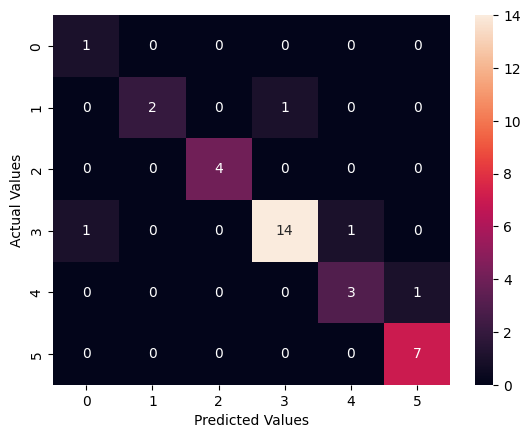

In [169]:
conf_mtx = confusion_matrix(y0_test_db1, best_model0_db1.predict(X0_test_db1))
fig = plt.figure()
sns.heatmap(conf_mtx, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()


Se muestran los casos donde el valor predicho difiere del valor real en el modelo.

In [170]:
y0_test_db1_2 = y0_test_db1.reset_index(drop=True)
y_pred_db1 = best_model0_db1.predict(X0_test_db1)
y_pred_db1 = np.array(y_pred_db1)

for i in range(len(y0_test_db1_2)):
    if y_pred_db1[i] != y0_test_db1_2['decoded'][i]:
        index = y0_test_db1.index[i]  # Índice real
        true_value = y0_test_db1_2['decoded'][i]
        print(f"Index: {index}, True Value: {true_value}, Predicted Value: {y_pred_db1[i]}")

Index: 70, True Value: 64, Predicted Value: 12
Index: 208, True Value: 32, Predicted Value: 64
Index: 182, True Value: 64, Predicted Value: 66
Index: 47, True Value: 66, Predicted Value: 72


El modelo se confunde en solo 4 casos, por ejemplo, confunde un compuesto (ID 70) que solo tiene hidroxamato (1000000), con un compuesto que tiene a-hidroxicarboxilato y carboxilato (0001100), y así se muestran los demás casos.



Para calcular las diferentes metricas, hay formas para promediar los resultados en las múltiples clases, por lo tanto, se usan:
- Macro-average, ya que permite que incluso las clases menos representativas tengan el mismo peso que las clases más comunes.
- Weighted-average, ya que calcula la métrica para cada clase de forma independiente pero al promediar da a cada clase un peso proporcional a su número de ocurrencias en los datos, y esto ayuda a equilibrar el impacto de las clases más o menos representadas.

In [171]:
# Macro-average
precision_macro = precision_score(y0_test_db1, y_pred_db1, average='macro')
recall_macro = recall_score(y0_test_db1, y_pred_db1, average='macro')
f1_macro = f1_score(y0_test_db1, y_pred_db1, average='macro')

print(f"\nMacro-average Precision: {precision_macro:.3f}")
print(f"Macro-average Recall: {recall_macro:.3f}")
print(f"Macro-average F1-Score: {f1_macro:.3f}")


Macro-average Precision: 0.843
Macro-average Recall: 0.882
Macro-average F1-Score: 0.842


In [172]:
# Weighted-average
precision_weighted = precision_score(y0_test_db1, y_pred_db1, average='weighted')
recall_weighted = recall_score(y0_test_db1, y_pred_db1, average='weighted')
f1_weighted = f1_score(y0_test_db1, y_pred_db1, average='weighted')

print(f"\nWeighted-average Precision: {precision_weighted:.3f}")
print(f"Weighted-average Recall: {recall_weighted:.3f}")
print(f"Weighted-average F1-Score: {f1_weighted:.3f}")


Weighted-average Precision: 0.902
Weighted-average Recall: 0.886
Weighted-average F1-Score: 0.887


**Método 2**

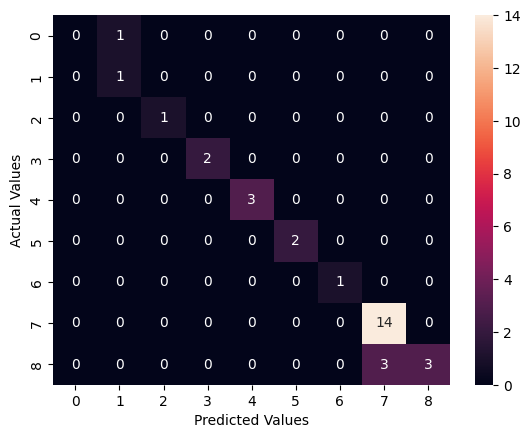

In [173]:
conf_mtx2 = confusion_matrix(y1_test_db1, best_model1_db1.predict(X1_test_db1))
fig = plt.figure()
sns.heatmap(conf_mtx2, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Ahora, se muestran los casos donde el valor predicho difiere del valor real en el modelo.

In [174]:
y1_test_db1_2 = y1_test_db1.reset_index(drop=True)
y_pr_db1 = best_model1_db1.predict(X1_test_db1)
y_pr_db1 = np.array(y_pr_db1)

for i in range(len(y1_test_db1_2)):
    if y_pr_db1[i] != y1_test_db1_2['decoded'][i]:
        index = y1_test_db1.index[i]  # Índice real
        true_value = y1_test_db1_2['decoded'][i]
        print(f"Index: {index}, True Value: {true_value}, Predicted Value: {y_pr_db1[i]}")

Index: 92, True Value: 3001000, Predicted Value: 3000000
Index: 93, True Value: 3001000, Predicted Value: 3000000
Index: 9, True Value: 1100, Predicted Value: 101000
Index: 91, True Value: 3001000, Predicted Value: 3000000


Al igual que con método anterior, este modelo se confunde en solo 4 casos, por ejemplo, confunde un compuesto (ID 92) que en realidad tiene 3 hidroxamatos
 y 1 carboxilato (3001000), con un compuesto que tiene solo 3 hidroxamatos (3000000), y así también se muestran los demás casos.

Se usan macro-average y weighted-average para calcular las métricas.

In [175]:
 # Macro-average
precision_macro = precision_score(y1_test_db1, y_pr_db1, average='macro')
recall_macro = recall_score(y1_test_db1, y_pr_db1, average='macro')
f1_macro = f1_score(y1_test_db1, y_pr_db1, average='macro')

print(f"\nMacro-average Precision: {precision_macro:.3f}")
print(f"Macro-average Recall: {recall_macro:.3f}")
print(f"Macro-average F1-Score: {f1_macro:.3f}")


Macro-average Precision: 0.814
Macro-average Recall: 0.833
Macro-average F1-Score: 0.804


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [176]:
# Weighted-average
precision_weighted = precision_score(y1_test_db1, y_pr_db1, average='weighted')
recall_weighted = recall_score(y1_test_db1, y_pr_db1, average='weighted')
f1_weighted = f1_score(y1_test_db1, y_pr_db1, average='weighted')

print(f"\nWeighted-average Precision: {precision_weighted:.3f}")
print(f"Weighted-average Recall: {recall_weighted:.3f}")
print(f"Weighted-average F1-Score: {f1_weighted:.3f}")


Weighted-average Precision: 0.872
Weighted-average Recall: 0.871
Weighted-average F1-Score: 0.849


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Empleando base de datos en cojunto

**Método 1**

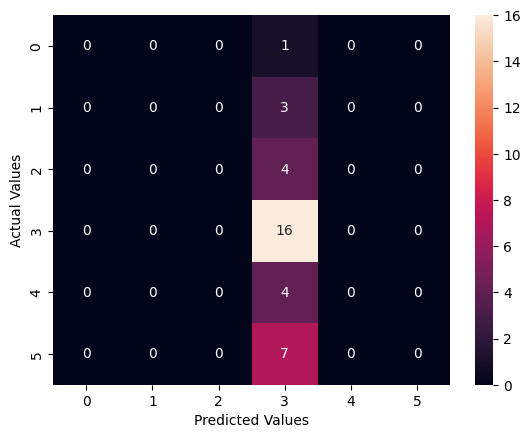

In [177]:
conf_mtx = confusion_matrix(y0_test_db_conj, best_model0_db_conj.predict(X0_test_db_conj))
fig = plt.figure()
sns.heatmap(conf_mtx, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Se muestran los casos donde el valor predicho difiere del valor real en el modelo.

In [178]:
y0_test_db_conj_2 = y0_test_db_conj.reset_index(drop=True)

y_pred_db_conj = best_model0_db_conj.predict(X0_test_db_conj)
y_pred_db_conj = np.array(y_pred_db_conj)

for i in range(len(y0_test_db_conj_2)):
    if y_pred_db_conj[i] != y0_test_db_conj_2['decoded'][i]:
        index = y0_test_db_conj.index[i]  # Índice real
        true_value = y0_test_db_conj_2['decoded'][i]
        print(f"Index: {index}, True Value: {true_value}, Predicted Value: {y_pred_db_conj[i]}")

Index: 90, True Value: 72, Predicted Value: 64
Index: 174, True Value: 66, Predicted Value: 64
Index: 190, True Value: 66, Predicted Value: 64
Index: 196, True Value: 72, Predicted Value: 64
Index: 208, True Value: 32, Predicted Value: 64
Index: 178, True Value: 40, Predicted Value: 64
Index: 37, True Value: 72, Predicted Value: 64
Index: 105, True Value: 40, Predicted Value: 64
Index: 30, True Value: 40, Predicted Value: 64
Index: 181, True Value: 66, Predicted Value: 64
Index: 35, True Value: 72, Predicted Value: 64
Index: 36, True Value: 72, Predicted Value: 64
Index: 65, True Value: 40, Predicted Value: 64
Index: 129, True Value: 72, Predicted Value: 64
Index: 22, True Value: 32, Predicted Value: 64
Index: 21, True Value: 32, Predicted Value: 64
Index: 9, True Value: 12, Predicted Value: 64
Index: 47, True Value: 66, Predicted Value: 64
Index: 92, True Value: 72, Predicted Value: 64


El modelo se confunde en muchos casos, por ejemplo, confunde un compuesto (ID 90) que  tiene hidroxamato y carboxilato (1001000), con un compuesto que tiene solo hidroxamato (100000), y así se muestran los demás casos.



Se emplean Macro-average y Weighted-average para calcular las métricas.

In [179]:
# Macro-average
precision_macro = precision_score(y0_test_db_conj, y_pred_db_conj, average='macro')
recall_macro = recall_score(y0_test_db_conj, y_pred_db_conj, average='macro')
f1_macro = f1_score(y0_test_db_conj, y_pred_db_conj, average='macro')

print(f"\nMacro-average Precision: {precision_macro:.3f}")
print(f"Macro-average Recall: {recall_macro:.3f}")
print(f"Macro-average F1-Score: {f1_macro:.3f}")


Macro-average Precision: 0.076
Macro-average Recall: 0.167
Macro-average F1-Score: 0.105


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [180]:
# Weighted-average
precision_weighted = precision_score(y0_test_db_conj, y_pred_db_conj, average='weighted')
recall_weighted = recall_score(y0_test_db_conj, y_pred_db_conj, average='weighted')
f1_weighted = f1_score(y0_test_db_conj, y_pred_db_conj, average='weighted')

print(f"\nWeighted-average Precision: {precision_weighted:.3f}")
print(f"Weighted-average Recall: {recall_weighted:.3f}")
print(f"Weighted-average F1-Score: {f1_weighted:.3f}")


Weighted-average Precision: 0.209
Weighted-average Recall: 0.457
Weighted-average F1-Score: 0.287


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Método 2**

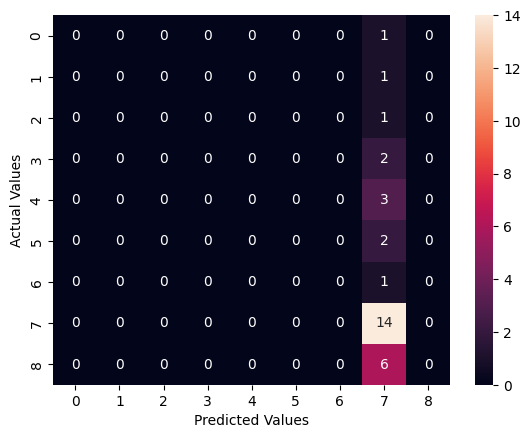

In [181]:
conf_mtx2 = confusion_matrix(y1_test_db_conj, best_model1_db_conj.predict(X1_test_db_conj))
fig = plt.figure()
sns.heatmap(conf_mtx2, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Ahora, se muestran los casos donde el valor predicho difiere del valor real en el modelo.

In [182]:
y1_test_db_conj_2 = y1_test_db_conj.reset_index(drop=True)

y_pr_db_conj = best_model1_db_conj.predict(X1_test_db_conj)
y_pr_db_conj = np.array(y_pr_db_conj)

for i in range(len(y1_test_db_conj_2)):
    if y_pr_db_conj[i] != y1_test_db_conj_2['decoded'][i]:
        index = y1_test_db_conj.index[i]  # Índice real
        true_value = y1_test_db_conj_2['decoded'][i]
        print(f"Index: {index}, True Value: {true_value}, Predicted Value: {y_pred_db_conj[i]}")

Index: 92, True Value: 3001000, Predicted Value: 64
Index: 107, True Value: 2000000, Predicted Value: 64
Index: 189, True Value: 300000, Predicted Value: 64
Index: 34, True Value: 3001000, Predicted Value: 64
Index: 22, True Value: 300000, Predicted Value: 64
Index: 186, True Value: 200000, Predicted Value: 64
Index: 142, True Value: 300000, Predicted Value: 64
Index: 24, True Value: 2000000, Predicted Value: 64
Index: 93, True Value: 3001000, Predicted Value: 64
Index: 9, True Value: 1100, Predicted Value: 64
Index: 38, True Value: 3001000, Predicted Value: 64
Index: 177, True Value: 201000, Predicted Value: 64
Index: 153, True Value: 101000, Predicted Value: 64
Index: 39, True Value: 3001000, Predicted Value: 64
Index: 91, True Value: 3001000, Predicted Value: 64
Index: 192, True Value: 2000010, Predicted Value: 64
Index: 111, True Value: 201000, Predicted Value: 64


Al igual que con método anterior, este modelo se confunde en varios casos, por ejemplo, confunde un compuesto (ID 92) que en realidad tiene 3 hidroxamatos y 1 carboxilato (3001000), con un compuesto que tiene solo 1 hidroxamato (100000), y así también se muestran los demás casos.

Se emplean macro-average y weighted-average para calcular las métricas.

In [183]:
# Macro-average
precision_macro = precision_score(y1_test_db_conj, y_pr_db_conj, average='macro')
recall_macro = recall_score(y1_test_db_conj, y_pr_db_conj, average='macro')
f1_macro = f1_score(y1_test_db_conj, y_pr_db_conj, average='macro')

print(f"\nMacro-average Precision: {precision_macro:.3f}")
print(f"Macro-average Recall: {recall_macro:.3f}")
print(f"Macro-average F1-Score: {f1_macro:.3f}")


Macro-average Precision: 0.050
Macro-average Recall: 0.111
Macro-average F1-Score: 0.069


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [184]:
# Weighted-average
precision_weighted = precision_score(y1_test_db_conj, y_pr_db_conj, average='weighted')
recall_weighted = recall_score(y1_test_db_conj, y_pr_db_conj, average='weighted')
f1_weighted = f1_score(y1_test_db_conj, y_pr_db_conj, average='weighted')

print(f"\nWeighted-average Precision: {precision_weighted:.3f}")
print(f"Weighted-average Recall: {recall_weighted:.3f}")
print(f"Weighted-average F1-Score: {f1_weighted:.3f}")


Weighted-average Precision: 0.204
Weighted-average Recall: 0.452
Weighted-average F1-Score: 0.281


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Discusión

Al utilizar solo los features de la base de datos 1, respecto al método 1, que es clasificar los compuestos que contengan los grupos funcionales mostrados (targets), se obtiene una precisión del 88% usando el clasificador SVM con los hiperparámetros mostrados. En el caso del método 2, que es determinar la cantidad de grupos funcionales que contiene cada compuesto, usando esta misma base de datos, se obtiene una precisión del 87% usando el clasificador SVM con sus respectivos hiperparámetros.

Por el otro lado, al utilizar la base de datos en conjunto (BD 1 al 3), no se logró realizar un tuneo de hiperparámetros en ninguno de los 2 métodos. Por tanto, para clasificar los compuestos y que contengan ciertos grupos funcionales, con el clasificador SVM solo se logró una precisión de menos del 50%. De igual forma, para determinar la cantidad exacta de grupos funcionales que contiene cada compuesto.

Esto muestra que al utilizar los features de la base de datos en conjunto, se añaden más features y eso aumenta la dimensionalidad del espacio de features, lo que hace que el clasificador SVM sea propenso a sobreajustar los datos de entrenamiento y a tener dificultades para generalizar datos nuevos, tal y como ocurrió al realizar el tuneo de hiperparametros. Además, en este caso, al usar más features (de la base de datos 2 y 3), se dificulta que el modelo encuentre patrones significativos y relevantes.

De igual manera, cabe resaltar que existió una mala distribución en la cantidad de muestras que existían para cada clase, ya que a pesar de eliminar las muestras que presentaban 5 occurencias o menos por clase, se tenían clases con gran cantidad de muestras, mientras que otras clases apenas llegaban a las 10 muestras. Por lo tanto, sería apropiado agregar mayor data a la base de datos, para que se puedan validar los modelos obtenidos de forma apropiada.

##Conclusiones

Se concluye que el clasificador SVM ofrece una eficacia notable en la identificación de grupos funcionales en los compuestos, con una precisión del 88%, y del igual manera logra precisar la cantidad de estos grupos, donde la precisión llega al 87%, todo esto al usar solo la base de datos 1. Al emplear la base de datos en conjunto, no se logra llegar a estos valores de precisión, siendo menor del 50% para ambos casos.

Por lo tanto, al utilizar solo la base de datos 1, en ambos métodos al afinar los modelos mediante técnicas de ajuste de hiperparámetros, tales intervenciones culminaron en mejoras destacables. En el caso de emplear la base de datos en conjunto, para ambos métodos, se generó un overfitting. Esto pone de manifiesto que el clasificador SVM cuenta con diversos hiperparámetros a modificar, lo que permite mejorar el rendimiento del modelo, siempre y cuando los features utilizados lo permitan. Asimismo, se demuestra que se obtienen modelos con mejores rendimientos al usar solo los features de la base de datos 1.

Además, a futuro se debería ampliar del conjunto de datos para enriquecer la representatividad de todas las clases. Una adecuada preparación de datos con una selección y configuración meticulosa de modelos, podrá mejorar la capacidad predictiva en la clasificación de los grupos funcionales de los sideróforos.